# "How to visualize what a NN is learning"
> "Insights from [\"Deep Learning for Coders with fastai & PyTorch\"](https://github.com/fastai/fastbook) and from around the world"

- toc: true
- branch: master
- badges: true
- hide_binder_badge: true
- comments: true
- author: Wayde Gilliam
- categories: [fastai, fastbook, fastbook-chapter-1, how-to, visualizations]
- image: images/articles/visualization-cnn-activations.png
- hide: false
- search_exclude: false
- permalink: /how-to/visualize-what-a-nn-is-learning

In [ ]:
#hide
! pip install fastai -Uqq

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn import manifold

%matplotlib inline

     |████████████████████████████████| 189 kB 5.5 MB/s 
     |████████████████████████████████| 56 kB 2.4 MB/s 


Arguably the best architecture for most computer vision tasks, here we take a look at **ResNet** and how it can be used in fastai for a variety of such tasks.

---
## Why is it important?

Because it allows you to know both what your NN is doing/learning and whether it is learning anything at all. The former is helpful because it gives you confidence that your model is learning to look at the right information and insights on how to improve it, the later because a model that isn't learning anything (e.g., able to update its parameters so as to improve itself) isn't a helpful or useful model.


> Tip: Learn how to visualize and understand your activations and gradients



---
## Visualizing computer vision models

The top of this image is a visualization of the weights (what the model is learning), and the one below is a visualization of the activations, in particular, the parts of training images that most strongly match each set of weights above. {% fn 1 %}

![](https://github.com/fastai/fastbook/raw/e57e3155824c81a54f915edf9505f64d5ccdad84/images/layer1.png)


> Tip: This kind of visualization is particularly helpful in transfer learning as it allows us to infer which layers may require more or less training for our task. For example, the layer above probably requires little to no training as it looks to be identifying edges and gradients, thing likely helpful and necessary for all computer vision tasks.



### Examples

#### Vectors into 2D grayscale images (MNIST)

*Courtesy of Abishek Thakur's, "Approaching (almost) any Machine Learning Problem" {% fn 2 %}*

In [ ]:
inputs, targets = datasets.fetch_openml('mnist_784', version=1, return_X_y=True)
targets = targets.astype(int)

inputs.shape, targets.shape # always helpful to see the shape of things

((70000, 784), (70000,))

(70000, 28, 28)


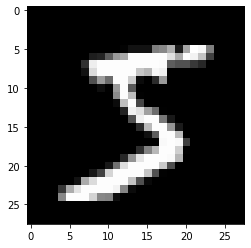

In [ ]:
# what is the difference between .view and .reshape?
# see https://stackoverflow.com/questions/49643225/whats-the-difference-between-reshape-and-view-in-pytorch
images = inputs.reshape((-1,28,28))

print(images.shape)
plt.imshow(images[0], cmap='gray')

#### Vectors as clusters  (MNIST)

*Courtesy of Abishek Thakur's, "Approaching (almost) any Machine Learning Problem" {% fn 3 %}*

In [ ]:
tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(inputs[:1000]) # reduces dimensionality of each vector to 2

In [ ]:
cluster_data = np.column_stack((transformed_data, targets[:1000]))
cluster_data.shape # transformed_data 2 dims (call them x and y) + targets 1 dim = 3

(1000, 3)

In [ ]:
tsne_df = pd.DataFrame(cluster_data, columns=['x', 'y', 'targets'])
print(len(tsne_df))
tsne_df.head(2)

1000


,x,y,targets
0,-15.668859,-13.853779,5.0
1,-14.389568,-51.056541,0.0


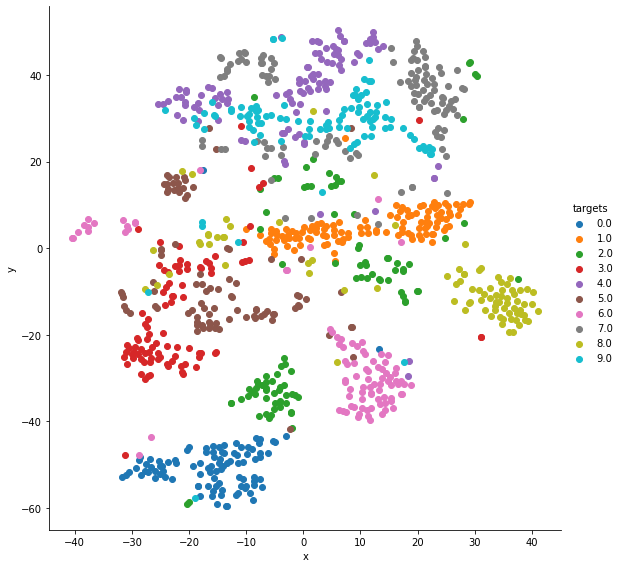

In [ ]:
viz = sns.FacetGrid(tsne_df, hue='targets', height=8)
viz.map(plt.scatter, 'x', 'y').add_legend()

---
{{ '"Chaper 1: Your Deep Learning Journey". In *[The Fastbook](https://www.amazon.com/Deep-Learning-Coders-fastai-PyTorch/dp/1492045527)* pp.33-36 provides several visualizations of what the parameters and activations look like at different layers in a CNN.' | fndetail: 1 }}

{{ '"Supervised vs unsupervised learning". In *[Approaching (almost) any Machine Learning Problem](https://www.amazon.com/Approaching-Almost-Machine-Learning-Problem-ebook/dp/B089P13QHT)* p.11' | fndetail: 2 }}

{{ 'Ibid., pp.12-13' | fndetail: 3 }}